In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [8]:
import pandas as pd

# Define column names for your dataset
column_names = ['Clothing ID' ,	'Age',	'Title',	'Review Text',	'Rating',	'Recommended IND',	'Positive Feedback Count',	'Division Name',	'Department Name',	'Class Name']

# Read the dataset from CSV file
df = pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv", names=column_names)

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())


First few rows of the DataFrame:
     Clothing ID  Age                    Title  \
NaN  Clothing ID  Age                    Title   
0.0          767   33                      NaN   
1.0         1080   34                      NaN   
2.0         1077   60  Some major design flaws   
3.0         1049   50         My favorite buy!   

                                           Review Text  Rating  \
NaN                                        Review Text  Rating   
0.0  Absolutely wonderful - silky and sexy and comf...       4   
1.0  Love this dress!  it's sooo pretty.  i happene...       5   
2.0  I had such high hopes for this dress and reall...       3   
3.0  I love, love, love this jumpsuit. it's fun, fl...       5   

     Recommended IND  Positive Feedback Count   Division Name  \
NaN  Recommended IND  Positive Feedback Count   Division Name   
0.0                1                        0       Initmates   
1.0                1                        4         General   
2.0      

In [10]:
import pandas as pd

# Load the dataset from the provided path
df = pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv")

# Only keep the columns we need
df = df[['Rating', 'Review Text']]

# Map the target labels to 'Negative' and 'Positive'
df['Sentiment'] = df['Rating'].map({1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'})

# Drop neutral reviews
df = df[df['Sentiment'] != 'Neutral']

# Check the balance of the classes
print(df['Sentiment'].value_counts())


Sentiment
Positive    18208
Negative     2407
Name: count, dtype: int64


In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Load your dataset

# Define the set of stopwords
stop_words = set(stopwords.words('english'))

# Define a function to preprocess text
def preprocess_text(text):
    # Remove any non-word characters and make everything lower case
    text = re.sub('[^a-zA-Z]', ' ', text.lower())
    # Split the text into words and remove stopwords, then stem words
    words = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    # Join words back into a single string
    return ' '.join(words)

# Convert the 'Review Text' column to strings
df['Review Text'] = df['Review Text'].astype(str)

# Apply the preprocessing function to the 'Text' column
df['Review Text'] = df['Review Text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
from sklearn.model_selection import train_test_split

# Assuming you already preprocessed the text and stored it in the 'Text' column
X = df['Review Text']
y = df['Sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer with maximum features
vectorizer = CountVectorizer(max_features=5000)

# Fit and transform the training data
X_train = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test = vectorizer.transform(X_test)


In [16]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
from sklearn.metrics import classification_report

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

    Negative       0.77      0.59      0.67       485
    Positive       0.95      0.98      0.96      3638

    accuracy                           0.93      4123
   macro avg       0.86      0.78      0.82      4123
weighted avg       0.93      0.93      0.93      4123



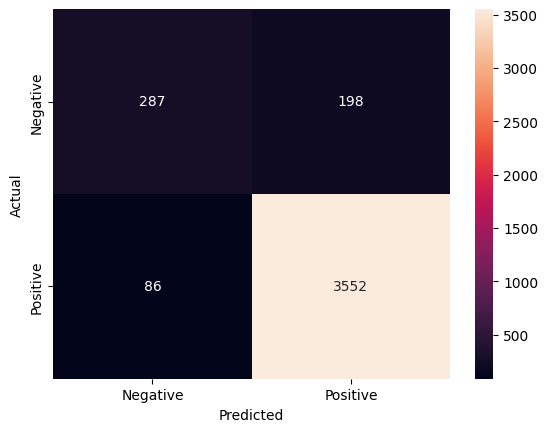

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, predictions)
sns.heatmap(conf_mat, annot=True, fmt="d",
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

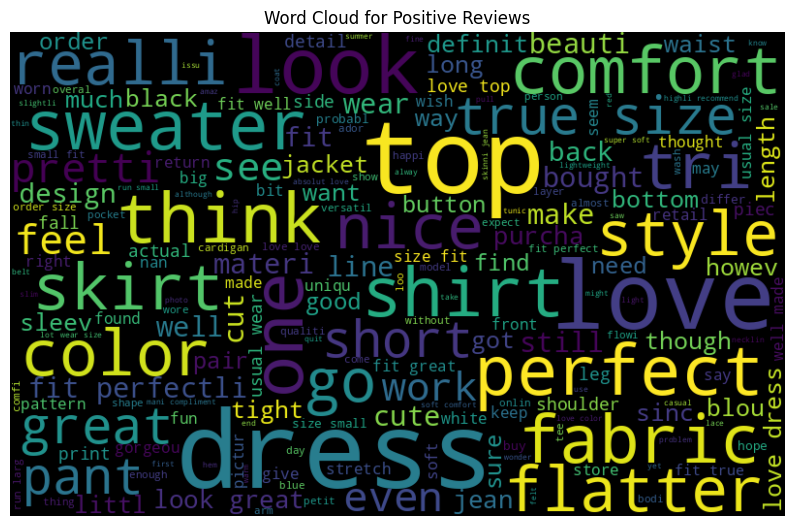

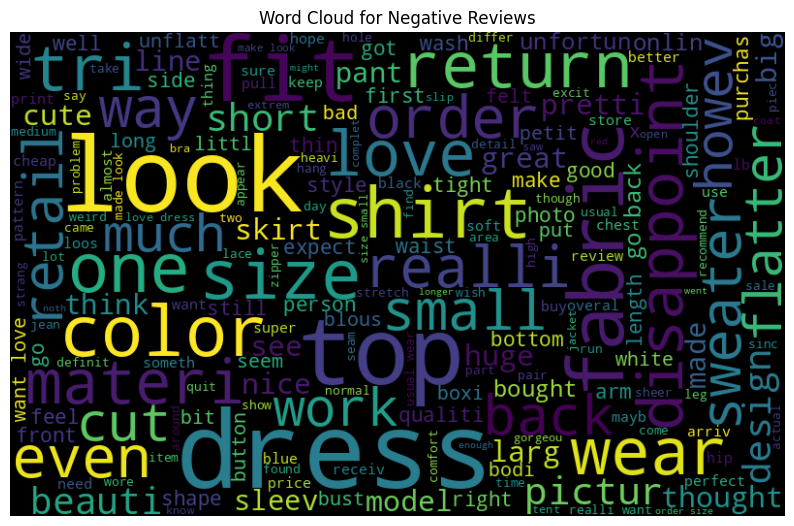

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate positive and negative reviews
positive_reviews = df[df['Sentiment'] == 'Positive']
negative_reviews = df[df['Sentiment'] == 'Negative']

# Generate word cloud for positive reviews
positive_text = ' '.join(positive_reviews['Review Text'])
positive_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_text)

# Plot word cloud for positive reviews
plt.figure(figsize=(10, 7))
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud for Positive Reviews")
plt.show()

# Generate word cloud for negative reviews
negative_text = ' '.join(negative_reviews['Review Text'])
negative_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_text)

# Plot word cloud for negative reviews
plt.figure(figsize=(10, 7))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud for Negative Reviews")
plt.show()
